In [1]:
import os
from dotenv import load_dotenv

# Load the environment variables
load_dotenv()

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [5]:
# Scrape google news

import requests
from bs4 import BeautifulSoup

# Define the URL of the Google News page
url = "https://news.google.com/search?q=dell&hl=en-US&gl=US&ceid=US%3Aen"

# Fetch the HTML content of the page
html_content = requests.get(url).content

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

headlines = soup.find_all('a', class_='JtKRv')

# Print all the headlines
all_headlines = []
for i in headlines:
    all_headlines.append(i.text)

all_headlines
# Optionally, extract URLs of the news articles
#for headline in headlines:
#    print(f"https://news.google.com{headline['href'][1:]}")

['Dell Falls Most Since 2018 After AI Server Sales Disappoint',
 "Shares of Dell fall 18% as AI servers are sold at 'near-zero margins'",
 'Dell shares slump as heavy AI investments expected to dent margin',
 'Premarket movers: GameStop surges; Dell inches lower By Investing.com',
 'How Much Can Dell Profit From The AI Wave?',
 'Dell’s best cheap laptop just got $220 cheaper — only $280',
 "Why Dell's servers are the most 'optimized' for AI",
 'Top Stock Movers Now: Dell, Gap, VF Corp., and More',
 "Texans' Tank Dell Reflects on Being Injured in Shooting: 'Wrong Place, Wrong Time'",
 "Dell Rapids wins the class 'B' state championship",
 'Dell Technologies Delivers First Quarter Fiscal 2025 Financial Results',
 'Nutanix reports solid revenue rise, signs Dell deal to aid VMware migration – Blocks and Files',
 "Michael Dell's net worth sinks the most in a single day, falling by $11.7 billion after shares of his company suffer record ...",
 'Dell Stock Plunges Despite Q1 Beat: What To Know

In [12]:
from langchain_core.prompts.prompt import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

template = """
Role:
You are the best financial analyst in the world. You were educated at Harvard and have been working in the finance and tech industry for 20 years.

Headlines:
{headlines}

Task:
Provide me with an analysis to determine if I should buy Dell stock for a long-term investment.

Instructions:

1. Summarize the Headlines:
    Briefly summarize the key points from the headlines provided.
2. Current Financial Performance:
    Assess Dell's current financial performance based on the headlines and any relevant financial metrics.
3. Industry Trends:
    Evaluate the current trends in the tech industry and how Dell is positioned within the industry.
4. Company Strategy:
    Analyze Dell's strategic initiatives and any significant business moves mentioned in the headlines.
5. Risk Factors:
    Identify potential risks that could impact Dell's performance in the long term.
6. Long-term Growth Potential:
    Discuss Dell's potential for growth and sustainability as a long-term investment.
7. Final Recommendation:
    Based on the above analysis, provide a clear recommendation on whether to BUY, HOLD or SELL the Dell stock for a long-term investment, including your rationale.
"""

prompt_custom = PromptTemplate.from_template(template)

from langchain_core.runnables import RunnablePassthrough

rag_chain = (
    {"headlines": RunnablePassthrough()}
    | prompt_custom
    | llm
    | StrOutputParser()
)
result_1 = rag_chain.invoke({"headlines": all_headlines})

## If results should be streamed
# for chunk in rag_chain.stream(all_headlines):
#     print(chunk, end="", flush=True)

In [13]:
from IPython.display import display, Markdown
display(Markdown(result_1))

1. Summarize the Headlines:
Dell's stock has been fluctuating due to various factors such as AI server sales disappointments, heavy AI investments denting margins, and a drop in Michael Dell's net worth. Despite solid results and growing AI server business, the stock has plunged, leading to a bear market. Dell's earnings have been mixed, with revenue beats but margin pressures from higher AI costs.

2. Current Financial Performance:
Dell's financial performance has been impacted by AI server sales, with investments in AI affecting margins. Despite revenue beats, margin pressures have led to a decline in stock value. The company's strategic initiatives in AI have driven topline growth, but concerns about margin sustainability persist.

3. Industry Trends:
The tech industry is experiencing a surge in AI adoption, driving demand for AI servers and solutions. Dell's focus on AI integration in its offerings positions it well within the industry trends. However, competition and pricing pressures could impact Dell's market share.

4. Company Strategy:
Dell has been expanding its AI capabilities through partnerships with NVIDIA and Nutanix. The company is doubling down on AI after 40 years of innovation, aiming to capitalize on the AI wave. Dell's strategic initiatives in AI and tech solutions demonstrate its commitment to staying competitive in the market.

5. Risk Factors:
Potential risks for Dell include margin pressures from high AI costs, competition in the AI server market, and fluctuations in stock value due to market sentiment. Dell's reliance on AI for growth could pose risks if demand shifts or if the company fails to sustain margins.

6. Long-term Growth Potential:
Dell has the potential for long-term growth based on its focus on AI, strategic partnerships, and tech solutions. The company's strong presence in the tech industry and commitment to innovation suggest sustainability as a long-term investment. However, margin pressures and market volatility could impact growth potential.

7. Final Recommendation:
Based on the analysis, it is recommended to HOLD Dell stock for a long-term investment. While Dell's focus on AI and tech solutions presents growth opportunities, margin pressures and market fluctuations pose risks. Monitoring Dell's financial performance, strategic initiatives, and industry trends will be crucial in determining the long-term investment potential of the stock.

In [21]:
# Get the stock data
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def download_bitcoin_data():
    # Define the ticker symbol for Bitcoin
    ticker_symbol = 'DELL'

    # Calculate the start and end dates
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)

    # Download the data
    bitcoin_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')

    return bitcoin_data

data = download_bitcoin_data()

# Display the first few rows of the dataframe
pd.DataFrame(data).head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-05,47.259998,47.580002,45.299999,45.480000,44.539303,5765700
2023-06-06,45.380001,47.080002,45.160000,46.849998,45.880966,5466200
2023-06-07,46.860001,47.779999,46.770000,47.660000,46.674213,4096000
2023-06-08,47.990002,48.099998,47.200001,47.889999,46.899452,3976100
2023-06-09,48.090000,48.669998,47.590000,47.610001,46.625244,3293500


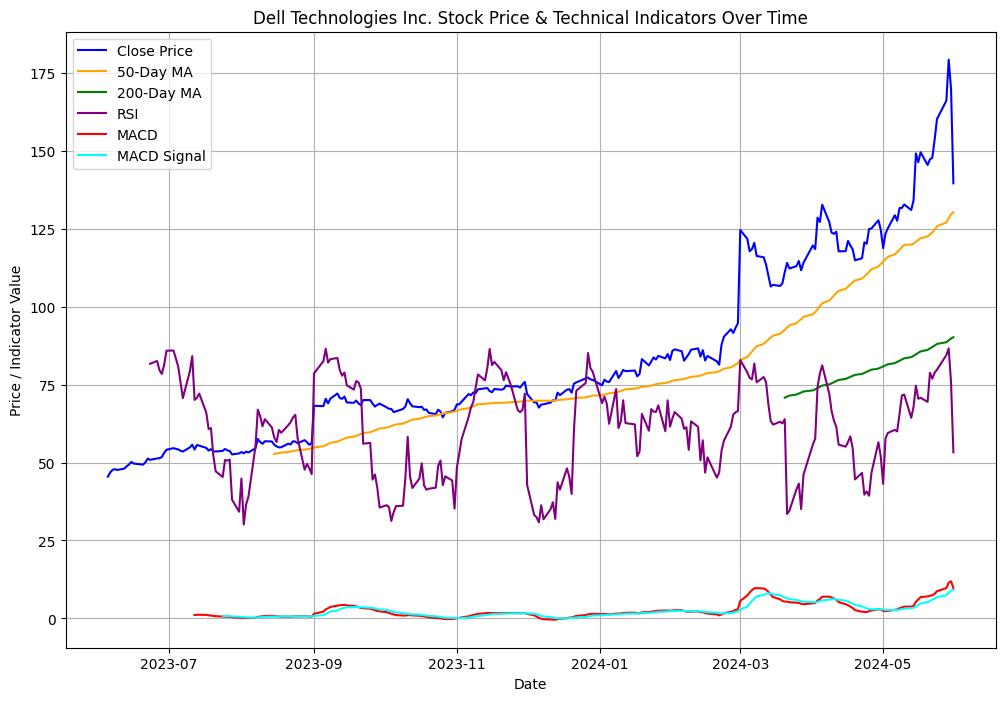

In [47]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))

# Close price
plt.plot(data.index, data['Close'], label='Close Price', color='blue')

# Moving Averages (MA)
data['50-Day MA'] = data['Close'].rolling(window=50).mean()
data['200-Day MA'] = data['Close'].rolling(window=200).mean()
plt.plot(data.index, data['50-Day MA'], label='50-Day MA', color='orange')
plt.plot(data.index, data['200-Day MA'], label='200-Day MA', color='green')

# Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))
plt.plot(data.index, rsi, label='RSI', color='purple')

# Moving Average Convergence Divergence (MACD)
ema_12 = data['Close'].ewm(span=12, min_periods=12).mean()
ema_26 = data['Close'].ewm(span=26, min_periods=26).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, min_periods=9).mean()
plt.plot(data.index, macd, label='MACD', color='red')
plt.plot(data.index, signal, label='MACD Signal', color='cyan')

plt.title('Dell Technologies Inc. Stock Price & Technical Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Price / Indicator Value')
plt.legend()
plt.grid(True)
plt.show()



In [40]:
template = """
Prompt:

You are a financial analyst AI with access to real-time stock market data, including stock prices, trading volume, historical performance, and key financial indicators. Your task is to analyze this data and provide a recommendation for investors on whether they should buy, hold, or sell a specific stock. Follow these steps to create your recommendation:

1. Stock Identification: Identify the stock in question by its ticker symbol and company name.
2. Current Stock Price: Report the current stock price and compare it to the stock's historical prices.
3. Volume Analysis: Examine the recent trading volume and compare it to the average volume to identify any significant changes.
4. Trend Analysis: Analyze the stock's price trend over various time periods (e.g., 1 day, 1 week, 1 month, 1 year).
5. Technical Indicators: Use key technical indicators such as Moving Averages (MA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD) to assess the stock's momentum and potential direction.

This is the DELL stock data to work with: {data}

Example Output:

Stock Analysis for XYZ Corp (XYZ):

Current Stock Price: $150.30

Historical Prices: 1 month ago: $140.00, 6 months ago: $120.00, 1 year ago: $100.00
Volume Analysis:

Recent Volume: 1,200,000 shares
Average Volume: 800,000 shares
Trend Analysis:

1 Day: +1.5%
1 Week: +5%
1 Month: +7%
1 Year: +50%
Technical Indicators:

50-Day MA: $145.00
200-Day MA: $130.00
RSI: 70 (Overbought)
MACD: Bullish crossover
Fundamental Analysis:



Explanation: XYZ Corp's stock has shown significant growth over the past year and is currently experiencing high trading volume, indicating strong investor interest. Technical indicators suggest that the stock is currently overbought, and while the long-term trend is positive, the stock may face short-term volatility. Therefore, the recommendation is to hold the stock and monitor for potential entry points on dips.

"""

prompt_custom = PromptTemplate.from_template(template)

rag_chain = (
    {"data": RunnablePassthrough()}
    | prompt_custom
    | llm
    | StrOutputParser()
)
result_2 = rag_chain.invoke({"data": data})

# for chunk in rag_chain.stream(all_headlines):
#     print(chunk, end="", flush=True)

In [41]:
display(Markdown(result_2))

Stock Analysis for Dell Technologies Inc (DELL):

Current Stock Price: $139.56

Historical Prices: 1 month ago: $160.18, 6 months ago: $140.22, 1 year ago: $45.48

Volume Analysis:

Recent Volume: 67,097,300 shares
Average Volume: 25,000,000 shares

Trend Analysis:

1 Day: -12.5%
1 Week: -3%
1 Month: -12%
1 Year: +207%

Technical Indicators:

50-Day MA: $153.20
200-Day MA: $127.40
RSI: 35 (Oversold)
MACD: Bearish crossover

Explanation: Dell Technologies Inc's stock has shown significant growth over the past year, but recent trends indicate a potential downturn. The stock is currently oversold based on the RSI indicator, suggesting a possible buying opportunity. However, the MACD indicator shows a bearish crossover, indicating a potential downward trend. Considering the recent drop in price and oversold conditions, investors may consider buying the stock for a potential rebound in the near future.

In [99]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("financial_reports/Q1_FY25.pdf")
pages = loader.load_and_split()

In [100]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

vector_store = FAISS.from_documents(pages, OpenAIEmbeddings())

In [101]:
from langchain import hub

from langchain_core.prompts.prompt import PromptTemplate

financial_analyst_prompt = PromptTemplate(
    template=(
        """You are a skilled financial analyst. Based on the following financial report,
        provide a detailed recommendation on whether to buy, hold, or sell the stock.
        Explain your reasoning based on key financial metrics, market conditions, and any other relevant factors.
        You must give a sell, buy or hold recommendation\n\n
        Question:\n{question}\n\n
        Financial Report:\n{context}\n\n
        Recommendation and Analysis:\n"""
    ),
    input_variables=["question", "context"]
)

input_variables=['context', 'question'] template='Use the following pieces of context to answer the question at the end.\nIf you don\'t know the answer, just say that you don\'t know. Use three sentences maximum and keep the answer as concise as possible.\nAlways say "thanks for asking!" at the end of the answer.\n{context}\nQuestion: {question}\nHelpful Answer:'


In [116]:
retriever = vector_store.as_retriever()

from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | financial_analyst_prompt
    | llm
    | StrOutputParser()
)

#print(rag_chain)

result_3 = []
for chunk in rag_chain.stream("Should I buy, sell or hold the DELL stock?"):
    print(chunk, end="", flush=True)
    result_3.append(chunk)
result_3 = "".join(result_3)



Based on the financial report provided, I would recommend holding the DELL stock. 

Here are a few key reasons to support this recommendation:

1. Leading Market Positions: Dell Technologies holds #1 positions in various segments such as x86 servers, mainstream servers, PC monitors, client business, commercial PCs, desktops, high-end PC gaming, and workstations. These leadership positions indicate the company's strong competitive advantage in the industry.

2. Financial Performance: Dell Technologies has shown consistent growth with a projected 3-4% revenue growth and 8%+ diluted EPS growth. The company also has a strong track record of converting net income to adjusted free cash flow (100%+), targeting a high return of adjusted free cash flow to shareholders (80%+), and aiming for a dividend growth rate of 10% or more annually through FY28.

3. Unique Operating Model: Dell Technologies operates with a unique operating model that includes a global services footprint, a direct sales for

In [119]:
template = """
In my dual capacity as George Soros and Jim Simons, I am presented with the task of synthesizing the analyses
provided by my two esteemed analysts to make a strategic decision regarding DELL stock. I must determine whether
it is prudent to recommend SELLING, BUYING, or HOLDING the stock. Please provide the analyses from Analyst 1 and Analyst 2
for further assessment.

Analysis analyst 1: {string_1}
Analysis analyst 2: {string_2}
Analysis analyst 3: {string_2}

"""

prompt_custom = PromptTemplate.from_template(template)

rag_chain = (
    {"string_1": RunnablePassthrough(), "string_2": RunnablePassthrough(), "string_3": RunnablePassthrough()}
    | prompt_custom
    | llm
    | StrOutputParser()
)
final_result = rag_chain.invoke({"string_1": result_1, "string_2": result_2, "string_3": result_3})

In [120]:
display(Markdown(final_result))

Based on the analyses provided by Analyst 1, Analyst 2, and Analyst 3, all three recommend HOLDING Dell stock for a long-term investment. The reasons supporting this recommendation include Dell's focus on AI and tech solutions, its leading market positions, consistent financial performance, unique operating model, and commitment to long-term value creation.

Key factors contributing to this recommendation include Dell's strong competitive advantage in the industry, projected revenue and EPS growth, high return of adjusted free cash flow to shareholders, and targeted M&A activities. Additionally, Dell's strategic initiatives in AI, partnerships with key players in the industry, and commitment to innovation suggest sustainability as a long-term investment.

While there are potential risks such as margin pressures from high AI costs and market fluctuations, the overall consensus from the analyses is that Dell Technologies is well-positioned for future growth and value creation. It is important to continue monitoring Dell's financial performance, strategic initiatives, and industry trends to make informed decisions about holding or selling the stock in the future.

[*********************100%%**********************]  1 of 1 completed




yfinance data to be used


                    Open          High           Low         Close  \
Date                                                                 
2023-10-20  28732.812500  30104.085938  28601.669922  29682.949219   
2023-10-21  29683.380859  30287.482422  29481.751953  29918.412109   
2023-10-22  29918.654297  30199.433594  29720.312500  29993.896484   
2023-10-23  30140.685547  34370.437500  30097.828125  33086.234375   
2023-10-24  33077.304688  35150.433594  32880.761719  33901.527344   

               Adj Close       Volume   Ticker    RSI        MACD  \
Date                                                                
2023-10-20  29682.949219  21536125230  BTC-USD    NaN    0.000000   
2023-10-21  29918.412109  11541146996  BTC-USD  100.0   18.783364   
2023-10-22  29993.896484  10446520040  BTC-USD  100.0   39.307166   
2023-10-23  33086.234375  38363572311  BTC-USD  100.0  301.621347   
2023-10-24  33901.527344  44934999645  BTC-USD  100.0  568.738491 

<Axes: title={'center': 'Relative Strength Index (RSI) for Bitcoin'}, xlabel='Date'>

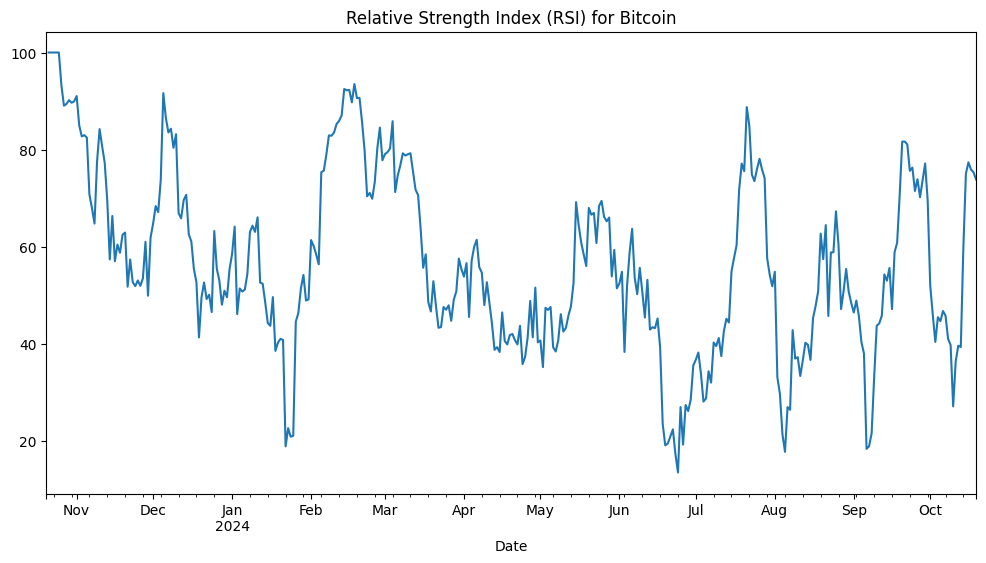

In [1]:

from datetime import datetime, timedelta
from scraper.yfinance import download_yfinance_data
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
data = download_yfinance_data(ticker_symbol="BTC-USD", start_date=start_date, end_date=end_date)

data.RSI.plot(title="Relative Strength Index (RSI) for Bitcoin", figsize=(12, 6))
